In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from torch_geometric.data import download_url, extract_zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

In [2]:
datasets = ['1_subsample_2018_2019_2000_users.csv',
            '2_subsample_2018_2019_2000_users_pruned.csv',
            '3_subsample_2018_2019_1000_users.csv',
            '4_subsample_2018_2019_1000_users_pruned.csv']

In [3]:
def print_statistics(G):
    print("Number of nodes:",nx.number_of_nodes(G))
    print("Number of edges:",nx.number_of_edges(G))
    print("Density:", round(nx.classes.function.density(G),4))
    print("Average degree:",round(np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G)))
    print("Min degree:", min(np.array([d for n, d in G.degree()])))
    print("Max degree:", max(np.array([d for n, d in G.degree()])))
    

Reading in the subsample ...
Subsample: 1_subsample_2018_2019_2000_users.csv
Number of nodes: 17087
Number of edges: 222959
Density: 0.0015
Average degree: 26
Min degree: 1
Max degree: 2122



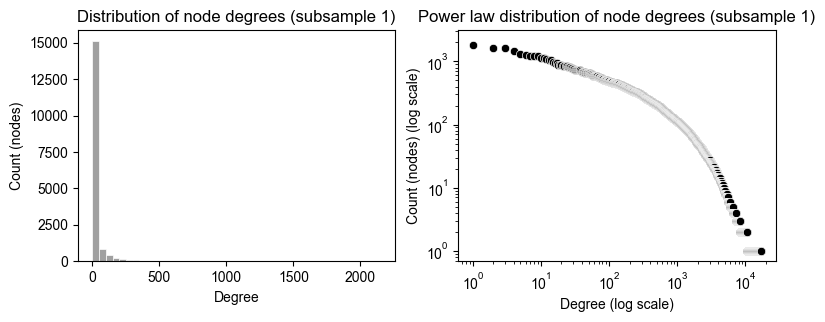

Reading in the subsample ...
Subsample: 2_subsample_2018_2019_2000_users_pruned.csv
Number of nodes: 4646
Number of edges: 192677
Density: 0.0179
Average degree: 83
Min degree: 11
Max degree: 1150



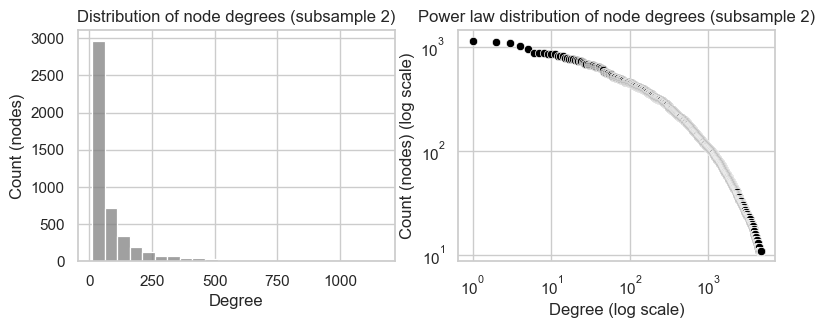

Reading in the subsample ...
Subsample: 3_subsample_2018_2019_1000_users.csv
Number of nodes: 11991
Number of edges: 117606
Density: 0.0016
Average degree: 20
Min degree: 1
Max degree: 1811



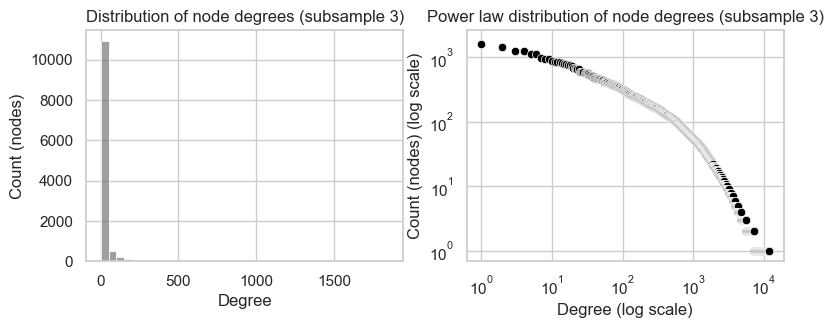

Reading in the subsample ...
Subsample: 4_subsample_2018_2019_1000_users_pruned.csv
Number of nodes: 2867
Number of edges: 95273
Density: 0.0232
Average degree: 66
Min degree: 10
Max degree: 969



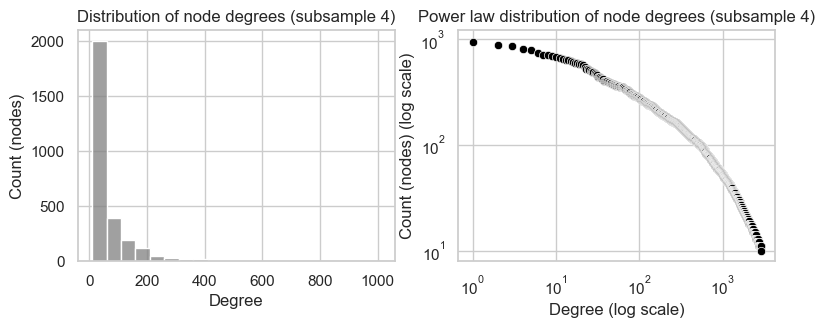

In [4]:
i=1

for dataset_file in datasets:
    
    fig, axes = plt.subplots(1,2,figsize=(9,3))
    
    print('Reading in the subsample ...')
    # Read in the subsample
    rating_path = f'./data/{dataset_file}'
    ratings = pd.read_csv(rating_path)

    # Create the undirected Networkx graph, where nodes represent users and movies and edges represent the ratings
    # that an user has given to a specific movie
    graph = nx.from_pandas_edgelist(ratings, source='userId', target='movieId', create_using=nx.Graph())
    
    print("Subsample:", dataset_file)
    print_statistics(graph)
    print()
    
    # Degrees of the graph nodes
    degrees = [graph.degree(n) for n in graph.nodes()]
    
    # Plot degree distribution
    sns.set_theme(style='whitegrid',rc={'axes.formatter.limits': (-8, 9)})
    sns.histplot(data=degrees, binwidth=50, color ='gray',ax=axes[0]).set(title=f"Distribution of node degrees (subsample {i})", xlabel='Degree', ylabel='Count (nodes)')
    
    # Plot degree distribution on log scale
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    sns.scatterplot(data=degree_sequence, color="black", ax = axes[1]).set(title=f"Power law distribution of node degrees (subsample {i})", xlabel='Degree (log scale)', ylabel='Count (nodes) (log scale)')
    plt.yscale("log")
    plt.xscale("log")
    
    plt.show()
    
    i+=1

### Degrees

In [5]:
# Choose the subsample accordingly 
rating_path = f'./data/3_subsample_2018_2019_1000_users.csv'
ratings = pd.read_csv(rating_path)

In [6]:
ratings.movieId.value_counts()

movieId
318       442
79132     440
2571      427
58559     384
2959      382
         ... 
181697      1
182429      1
183605      1
183607      1
176521      1
Name: count, Length: 11042, dtype: int64

In [7]:
ratings.userId.value_counts()

userId
41013     1811
3624      1566
19379     1469
91978     1261
96472     1243
          ... 
33880        1
126530       1
75558        1
34204        1
162498       1
Name: count, Length: 1000, dtype: int64

In [8]:
ratings[ratings["userId"]==41013]

,userId,movieId,rating,timestamp,year
29691,41013,1,4.0,2018-03-14 16:20:44,2018
29692,41013,6,4.0,2018-03-12 14:34:51,2018
29693,41013,7,3.0,2018-04-12 22:54:23,2018
29694,41013,16,4.0,2018-04-12 22:35:43,2018
29695,41013,17,4.0,2018-03-12 14:28:56,2018
...,...,...,...,...,...
31497,41013,184257,5.0,2018-07-16 02:38:54,2018
31498,41013,185029,4.0,2018-07-30 02:59:23,2018
31499,41013,185435,3.5,2018-04-29 21:00:03,2018
31500,41013,186039,4.0,2018-03-29 01:55:45,2018


## Plotting the network with Pyvis

In [9]:
from pyvis.network import Network

In [10]:
# Choosing one subset to create a networkx graph to plot it
rating_path = f'./data/1_subsample_2018_2019_2000_users.csv'
ratings = pd.read_csv(rating_path)

# Reading in movie features data
movies_path = './data/movie_ml_imdb.csv'
movies = pd.read_csv(movies_path, sep='\t')

# To plot the movie titles, add corresponding movie titles to the ratings 
ratings_merged = pd.merge(ratings, movies[['movieId','title']], on='movieId')

# Take out a small portion of that dataset just for an example
ratings_small = ratings_merged[0:500]
graph_vis = nx.from_pandas_edgelist(ratings_small, source='userId', target='movieId', create_using=nx.Graph())

In [11]:
net = Network()

# Iterate over the rows of the DataFrame
for index, row in ratings_small.iterrows():
    user_id = str(row['userId'])
    movie_id = str(row['movieId'])
    movie_title = str(row['title'])
    rating = row['rating']

    # Add nodes and edges to the network
    # Add labels and titles to them. Labels are visible right away, titles become visible if to click on the edge/node.
    net.add_node(user_id, label=user_id, color = "#D6E8DB")
    net.add_node(movie_id, label=movie_title, color = '#99A98F')
    net.add_edge(user_id, movie_id, title = rating, color = "#C1D0B5")
    
net.show("graph_subsample.html")